In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
filename ="person_info_test1.xlsx"
df = pd.read_excel(filename)

In [3]:
df.head()

,Unnamed: 0,user_id,car_id,car_driving_time,car_driving_day,car_driving_time_everyday,start_datetime,end_datetime,workdaySum,weekendSum,...,weekendGo,weekendGo_process,workdayGo,workdayGo_process,having_kindergarten,having_primary_school,having_middle_school,is_office_worker,consumer_address,each_hour_driving_time
0,0,002b1dbb-c643-49c0-bba7-7e41ed90c728,ffcc91d2-ab1e-4152-9fd9-4289495fcc96,843,223,3.78,2017-10-11,2019-01-07,158,65,...,"['德厚村', '小米专卖店', '广东省佛山市顺德区容桂街道仁和堂药业(扁滘分店)', '...","['德厚村', '小米专卖店', '仁和堂药业', '塘坑小学', '佐川电器', '扁滘民...","['德厚村', '小米专卖店', '广东省佛山市顺德区容桂街道仁和堂药业(扁滘分店)', '...","['德厚村', '小米专卖店', '仁和堂药业', '塘坑小学', '塘坑村', '扁滘外工...",NaN,塘坑小学,NaN,非上班族,[],"[9, 7, 2, 1, 3, 5, 10, 16, 16, 33, 37, 31, 42,..."
1,1,025f90a6a2c64974a02b7336233886e8,931033865768665088,2511,348,7.22,2017-11-16,2019-01-08,250,98,...,"['河南省洛阳市嵩县车村镇311国道', '河南省洛阳市嵩县车村镇岭后', '无名路', '...","['岭后', '下地', '洛阳根雕奇石宾馆', '天桥沟小学-南门', '天桥沟小学-附属...","['河南省洛阳市嵩县车村镇311国道', '河南省洛阳市嵩县车村镇岭后', '无名路', '...","['岭后', '洛阳根雕奇石宾馆', '鑫莉宾馆']",NaN,NaN,NaN,上班族,[],"[20, 15, 10, 5, 10, 11, 20, 91, 123, 109, 98, ..."
2,2,034ecc1d57a141f39804b009fb6af174,47923323-0499-4e80-8c5e-ed83469b69d0,474,115,4.12,2018-01-07,2019-01-08,88,27,...,"['牛时历', '广东省湛江市廉江市长山镇长谷线', '广东省东莞市常平镇沙梨园路', '长...","['牛时历', '长谷线', '长山', '天盛毛织厂', '石桥', '政府', '长山农...","['牛时历', '广东省湛江市廉江市长山镇长谷线', '广东省东莞市常平镇沙梨园路', '天...","['牛时历', '长谷线', '天盛毛织厂', '石桥', '长山', '永昌隆平价超市长山...",NaN,NaN,NaN,非上班族,[],"[5, 4, 4, 5, 5, 9, 7, 13, 18, 18, 23, 21, 19, ..."
3,3,037dc8d1-9af3-4d90-8e55-73f48c473675,f35e4e0b-ea6b-4e64-bc97-5ad0244498a5,2799,402,6.96,2017-11-23,2019-01-08,287,115,...,"['湖南省娄底市涟源市石马山镇土地冲', '湖南省娄底市涟源市石马山镇九皇门业', '土地冲...","['土地冲', '九皇门业', '大自然柯拉尼橱柜衣柜', '大排上', '湖湘王板材', ...","['湖南省娄底市涟源市石马山镇土地冲', '湖南省娄底市涟源市石马山镇九皇门业', '土地冲...","['土地冲', '九皇门业', 'G55二广高速', '湖湘王板材']",NaN,NaN,NaN,上班族,[],"[34, 11, 7, 2, 11, 18, 45, 175, 126, 78, 68, 6..."
4,4,0504da89230d497991ab4d5da0c48eb3,22ea659c-1fc5-49b5-b05e-07934dee0d77,310,93,3.33,2018-02-05,2019-01-06,66,27,...,"['云南省红河哈尼族彝族自治州泸西县中枢镇逸挨段', '云南省红河哈尼族彝族自治州泸西县永宁...","['逸挨段', '老中山', '纳堡', '人民医院口腔科泸西县人民医院', '永宁乡阿朝段...","['云南省红河哈尼族彝族自治州泸西县中枢镇逸挨段', '云南省红河哈尼族彝族自治州泸西县中枢...","['逸挨段', '永宁乡冒南段', '人民医院口腔科泸西县人民医院', '永宁乡舍者村民委员...",NaN,NaN,NaN,非上班族,[],"[4, 1, 0, 2, 2, 6, 1, 5, 5, 6, 8, 10, 12, 5, 6..."


In [4]:
df['each_hour_driving_time'][:5]

0    [9, 7, 2, 1, 3, 5, 10, 16, 16, 33, 37, 31, 42,...
1    [20, 15, 10, 5, 10, 11, 20, 91, 123, 109, 98, ...
2    [5, 4, 4, 5, 5, 9, 7, 13, 18, 18, 23, 21, 19, ...
3    [34, 11, 7, 2, 11, 18, 45, 175, 126, 78, 68, 6...
4    [4, 1, 0, 2, 2, 6, 1, 5, 5, 6, 8, 10, 12, 5, 6...
Name: each_hour_driving_time, dtype: object

In [5]:
df['each_hour_driving_time'][0]

'[9, 7, 2, 1, 3, 5, 10, 16, 16, 33, 37, 31, 42, 37, 42, 37, 27, 23, 23, 24, 24, 26, 24, 24]'

In [6]:
type(df['each_hour_driving_time'][0])

str

In [7]:
def conver_to_list(row):
    arr = row.replace('[','').replace(']','').replace(' ','').split(',')
    arr = list(map(float,arr))
    arr = np.array(arr).reshape(-1, 1)
    ys_standard = StandardScaler().fit_transform(X=arr)
    ys_standard_list = []
    for i in ys_standard:
        ys_standard_list.append(i[0])
    
    return ys_standard_list

In [8]:
df['each_hour_driving_time_standard'] = df['each_hour_driving_time'].apply(conver_to_list)

In [9]:
df['each_hour_driving_time_standard'][0]

[-1.01180265351968,
 -1.1699998110732457,
 -1.5654927049571596,
 -1.6445912837339425,
 -1.4863941261803768,
 -1.3281969686268111,
 -0.9327040747428973,
 -0.45811260208220045,
 -0.45811260208220045,
 0.8865632371231071,
 1.2029575522302383,
 0.7283660795695415,
 1.5984504461141522,
 1.2029575522302383,
 1.5984504461141522,
 1.2029575522302383,
 0.4119717644624103,
 0.09557744935527912,
 0.09557744935527912,
 0.17467602813206193,
 0.17467602813206193,
 0.3328731856856275,
 0.17467602813206193,
 0.17467602813206193]

In [10]:
def get_nums(row,hour):
    return row[hour]



In [11]:
for i in range(24):
    df['hour_'+str(i)] = df['each_hour_driving_time_standard'].apply(get_nums,args=(i,))
df.shape

(281, 80)

In [12]:
df.head()

,Unnamed: 0,user_id,car_id,car_driving_time,car_driving_day,car_driving_time_everyday,start_datetime,end_datetime,workdaySum,weekendSum,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,002b1dbb-c643-49c0-bba7-7e41ed90c728,ffcc91d2-ab1e-4152-9fd9-4289495fcc96,843,223,3.78,2017-10-11,2019-01-07,158,65,...,1.598450,1.202958,0.411972,0.095577,0.095577,0.174676,0.174676,0.332873,0.174676,0.174676
1,1,025f90a6a2c64974a02b7336233886e8,931033865768665088,2511,348,7.22,2017-11-16,2019-01-08,250,98,...,0.901431,1.009603,1.252990,0.631002,-0.099157,-0.126200,-0.640016,-0.396630,-0.829317,-1.099746
2,2,034ecc1d57a141f39804b009fb6af174,47923323-0499-4e80-8c5e-ed83469b69d0,474,115,4.12,2018-01-07,2019-01-08,88,27,...,0.499060,0.203321,0.942668,-0.536027,1.090538,-0.831766,-0.092418,-1.275375,-1.423244,-1.423244
3,3,037dc8d1-9af3-4d90-8e55-73f48c473675,f35e4e0b-ea6b-4e64-bc97-5ad0244498a5,2799,402,6.96,2017-11-23,2019-01-08,287,115,...,0.126132,0.126132,0.753989,1.852738,1.224881,0.014015,-0.456878,-0.860500,-0.927770,-0.658689
4,4,0504da89230d497991ab4d5da0c48eb3,22ea659c-1fc5-49b5-b05e-07934dee0d77,310,93,3.33,2018-02-05,2019-01-06,66,27,...,-0.171728,-0.359068,-0.546408,-0.546408,-0.171728,3.013051,2.076352,0.577632,1.139652,0.577632


In [13]:
cols = ["hour"+str(i) for i in range(24)]
standardData = df.iloc[:,-24:]
standardData.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.011803,-1.170000,-1.565493,-1.644591,-1.486394,-1.328197,-0.932704,-0.458113,-0.458113,0.886563,...,1.598450,1.202958,0.411972,0.095577,0.095577,0.174676,0.174676,0.332873,0.174676,0.174676
1,-0.910446,-1.045661,-1.180875,-1.316090,-1.180875,-1.153832,-0.910446,1.009603,1.874977,1.496376,...,0.901431,1.009603,1.252990,0.631002,-0.099157,-0.126200,-0.640016,-0.396630,-0.829317,-1.099746
2,-0.831766,-0.979635,-0.979635,-0.831766,-0.831766,-0.240288,-0.536027,0.351190,1.090538,1.090538,...,0.499060,0.203321,0.942668,-0.536027,1.090538,-0.831766,-0.092418,-1.275375,-1.423244,-1.423244
3,-0.591419,-1.107158,-1.196852,-1.308969,-1.107158,-0.950194,-0.344761,2.570288,1.471539,0.395213,...,0.126132,0.126132,0.753989,1.852738,1.224881,0.014015,-0.456878,-0.860500,-0.927770,-0.658689
4,-0.546408,-1.108428,-1.295768,-0.921088,-0.921088,-0.171728,-1.108428,-0.359068,-0.359068,-0.171728,...,-0.171728,-0.359068,-0.546408,-0.546408,-0.171728,3.013051,2.076352,0.577632,1.139652,0.577632


In [14]:
#init='random'
def res(methed='kmeans',cluster=5):
    
    kmeans = KMeans(n_clusters=cluster,random_state=0).fit(standardData)
    # kmeans.labels_
    # from sklearn.cluster import DBSCAN
    # dbsacn = DBSCAN(eps=1.5, min_samples=2).fit(standardData)
    # dbsacn.labels_
    #与KMeans 基本一样
    from sklearn.cluster import Birch
    brc = Birch(branching_factor=50, n_clusters=cluster, threshold=0.5,compute_labels=True).fit(standardData)
    brc_label = brc.predict(standardData)
    # brc_label
    if methed == 'kmeans':
        return kmeans.labels_
    else:
        return brc_label
# from sklearn.cluster import MeanShift

# #不行 没有指定簇的都不行  
# meanShift = MeanShift(bandwidth=2).fit(standardData)
# meanShift_label = meanShift.labels_
# #meanShift_label

In [15]:
# kmeans.labels_

In [16]:
df['label'] = res(methed='kmeans',cluster=5)
#  df['label'] = brc_label

In [17]:
#df.head()

<Figure size 432x288 with 0 Axes>

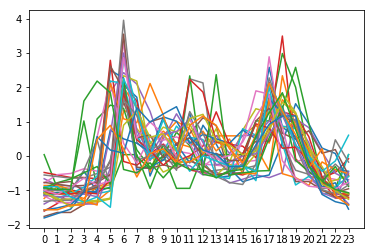

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#df['label'][:10]

#df['each_hour_driving_time_standard'][0]

fig = plt.figure()
x = [i for i in range(0,24)]
# y1 = df['each_hour_driving_time_standard'][3]
# y2 = df['each_hour_driving_time_standard'][4]
# y

# plt.plot(x,y1,kmeans.labels_[1])
# plt.plot(x,y2,kmeans.labels_[2])
# plt.xticks(range(24))

test = df[df['label']==0]

#test.head()

color = ['g','r','y','b']
fig = plt.figure()
x = [i for i in range(0,24)]
for i in range(test.shape[0]):
    y1 =test['each_hour_driving_time_standard'].iloc[i]
    #plt.plot(x,y1,c=color[kmeans.labels_[i]])
    plt.plot(x,y1)
    # plt.plot(x,y1,c=color[brc_label[i]])
    plt.xticks(range(24))
plt.show()

In [19]:
# plt.plot(x,y1,kmeans.labels_[1])
# plt.xticks(range(24))
df.columns

Index(['Unnamed: 0', 'user_id', 'car_id', 'car_driving_time',
       'car_driving_day', 'car_driving_time_everyday', 'start_datetime',
       'end_datetime', 'workdaySum', 'weekendSum', 'rate', 'province', 'city',
       'region', 'county', 'town', 'start_to_end_list', 'driving_time_often',
       'startaddress', 'startaddress_process', 'count_start_address_',
       'sum_start_address_', 'everyday_end_address',
       'everyday_end_address_process', 'count_everyday_end_address_',
       'sum_everyday_end_address_', 'everyday_first_stop_address',
       'everyday_first_stop_address_process', 'everyday_first_stop_times_',
       'everyday_first_stop_times_sum_', 'everyday_stay_long_address',
       'everyday_stay_long_address_process', 'everyday_stay_long_times_',
       'everyday_stay_long_sum_', 'everyday_stay_long_address_6_21',
       'everyday_stay_long_address_6_21_process',
       'everyday_stay_long_times_6_21_', 'everyday_stay_long_sum_6_21_',
       'everyday_stay_long_address

In [ ]:
drop_colums =['hour_'+str(i) for i in range(0,24)]
df = df.drop(columns=drop_colums)
df = df.drop(columns=['each_hour_driving_time_standard'])
df.head()

In [20]:
standardData.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.011803,-1.170000,-1.565493,-1.644591,-1.486394,-1.328197,-0.932704,-0.458113,-0.458113,0.886563,...,1.598450,1.202958,0.411972,0.095577,0.095577,0.174676,0.174676,0.332873,0.174676,0.174676
1,-0.910446,-1.045661,-1.180875,-1.316090,-1.180875,-1.153832,-0.910446,1.009603,1.874977,1.496376,...,0.901431,1.009603,1.252990,0.631002,-0.099157,-0.126200,-0.640016,-0.396630,-0.829317,-1.099746
2,-0.831766,-0.979635,-0.979635,-0.831766,-0.831766,-0.240288,-0.536027,0.351190,1.090538,1.090538,...,0.499060,0.203321,0.942668,-0.536027,1.090538,-0.831766,-0.092418,-1.275375,-1.423244,-1.423244
3,-0.591419,-1.107158,-1.196852,-1.308969,-1.107158,-0.950194,-0.344761,2.570288,1.471539,0.395213,...,0.126132,0.126132,0.753989,1.852738,1.224881,0.014015,-0.456878,-0.860500,-0.927770,-0.658689
4,-0.546408,-1.108428,-1.295768,-0.921088,-0.921088,-0.171728,-1.108428,-0.359068,-0.359068,-0.171728,...,-0.171728,-0.359068,-0.546408,-0.546408,-0.171728,3.013051,2.076352,0.577632,1.139652,0.577632


In [22]:
#standardData['hour_7'].max

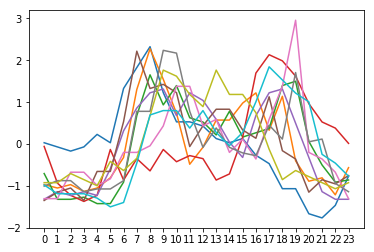

In [47]:
fig = plt.figure()
x = [i for i in range(0,24)]
for i in range(200,210):
    y1 =standardData.iloc[i]
    #plt.plot(x,y1,c=color[kmeans.labels_[i]])
    plt.plot(x,y1)
    # plt.plot(x,y1,c=color[brc_label[i]])
    plt.xticks(range(24))
plt.show()

3 :8:5点 不是特别明显 可排除 array([[-0.5914186 , -1.10715804, -1.19685186, -1.30896913, -1.10715804,
        -0.95019387, -0.34476061,  2.57028842,  1.47153917,  0.39521338,
         0.17097884,  0.03643811,  0.37278992,  0.39521338,  0.12613193,
         0.12613193,  0.75398864,  1.85273789,  1.22488118,  0.01401466,
        -0.45687788, -0.86050005, -0.92777041, -0.65868896]])
34:7点到6点   array([[-0.47792324, -0.55074964, -0.62357603, -0.62357603, -0.65998923,
        -0.55074964,  2.1074139 ,  1.59762911, -0.07737805,  0.10468795,
         0.17751435, -0.40509684, -0.47792324, -0.55074964, -0.47792324,
        -0.55074964, -0.40509684,  0.68729913,  3.49111546, -0.07737805,
        -0.47792324, -0.62357603, -0.47792324, -0.07737805]])
        
55:8点到5点  array([[-0.57558602, -0.54844641, -0.54844641, -0.60272564, -0.60272564,
        -0.54844641, -0.1956314 ,  3.54963562, -0.30418986,  0.04862515,
         0.13004399, -0.22277102, -0.33132948, -0.05993332, -0.1956314 ,
        -0.16849178, -0.08707293,  2.78972637,  0.42857977, -0.33132948,
        -0.49416718, -0.60272564, -0.60272564,  0.07576476]])

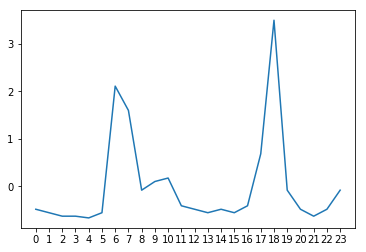

In [83]:
y2 =standardData.iloc[34]  # 3：8:5点        34:7点到6点     55：8点到5点
#plt.plot(x,y1,c=color[kmeans.labels_[i]])
plt.plot(x,y2)
# plt.plot(x,y1,c=color[brc_label[i]])
plt.xticks(range(24))
plt.show()

In [84]:
#y2

In [85]:
y3=y2.values.reshape(1,-1)
#y3

In [86]:
standardData.shape

(281, 24)

In [94]:
diffMat = np.tile(y3,(standardData.shape[0],1))-standardData

sqDiffMat = diffMat ** 2

sqDistance = sqDiffMat.sum(axis=1)

distance = sqDistance ** 0.5

#distance

sortedDisIndex = distance.argsort()
#sortedDisIndex   #从小到大

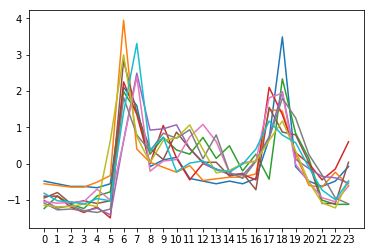

In [96]:
fig = plt.figure()
x = [i for i in range(0,24)]
for i in range(10):
    y1 =standardData.iloc[sortedDisIndex[i]]
    #plt.plot(x,y1,c=color[kmeans.labels_[i]])
    plt.plot(x,y1)
    # plt.plot(x,y1,c=color[brc_label[i]])
    plt.xticks(range(24))
plt.show()